# Лабораториска вежба 1

---


Сретен Главинчески | 226019

### Опис

---


Ќе работиме со податочно множество чија цел е класификација на гама честички во однос на шум. Во продолжение се претставени некои метрики за податочното множество, визуелизации со кои добро може да се согледаат карактеристиките, како и искористени се повеќе методи за класификација, т.е Naïve Bayes, LDA и QDA од библиотеката sklearn. На крај е дадена споредба на точноста при класификација од трите методи.

### Вчитување на потребните библиотеки

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Вчитување на податочно множество

In [44]:
df = pd.read_csv('/content/sample_data/magic04.data')

feature_names = list(df.columns[:-1])
number_of_features = len(feature_names)

class_names = list(df["class"].unique())
number_of_classes = len(class_names)

print(f'Број и имиња на атрибути: {number_of_features} {feature_names}')
print(f'Број и имиња на класи: {number_of_classes} {class_names}')
print(f'Број на примероци: {df.shape[0]}')

Број и имиња на атрибути: 10 ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
Број и имиња на класи: 2 ['g', 'h']
Број на примероци: 19020


### Анализа на податоците

Првите 10 примероци

In [27]:
df.head(10)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
6   48.2468   17.3565  3.0332  0.2529  0.1515    8.5730  38.0957   10.5868   
7   26.7897   13.7595  2.5521  0.4236  0.2174   29.6339  20.4560   -2.9292   
8   96.2327   46.5165  4.1540  0.0779  0.0390  110.3550  85.0486   43.1844   
9   46.7619   15.1993  2.5786  0.3377  0.1913   24.7548  43.8771   -6.6812   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
5   3.6130  238.0980     g  
6   4.7920  219.0870     g  
7   0.8120  237.1340     g  
8   4.8540  248.2260     g  
9   7.8750  102.2510     g

Статистика на променливи

In [28]:
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

Проверка дали фалат вредности

In [29]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

Проверка колку примероци има секоја класа

In [31]:
df.value_counts("class")

class
g    12332
h     6688
Name: count, dtype: int64

**Корелациска Матрица** (heatmap) покажува како секој атрибут е поврзан со останатите атрибути во податочното множество, користејќи Пирсонова корелација.

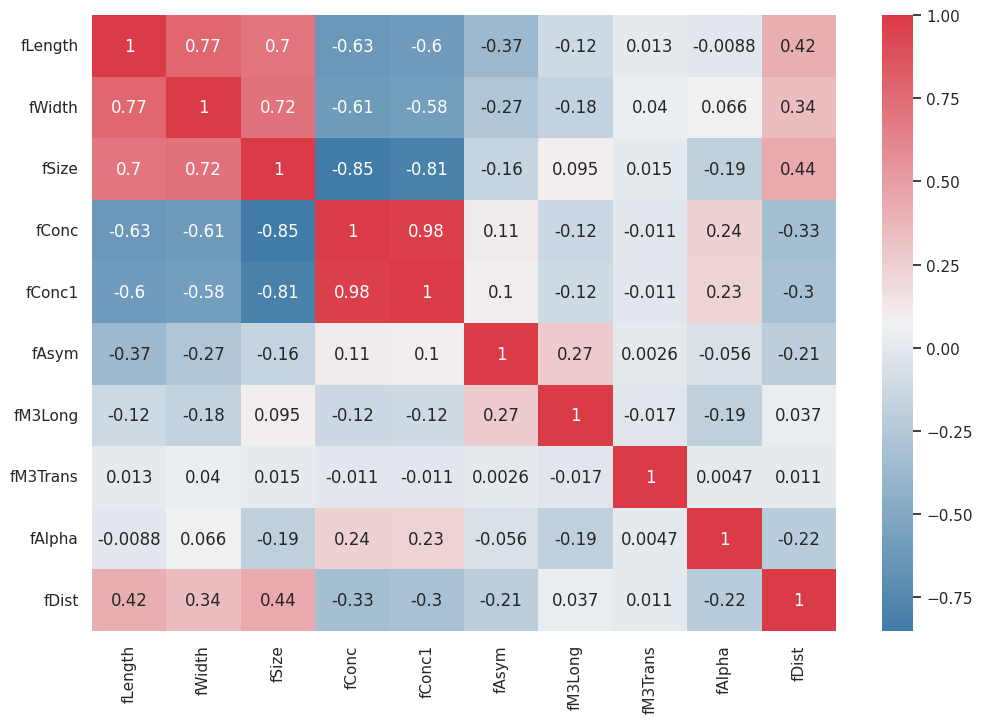

In [100]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.heatmap(
    df[feature_names].corr("pearson"),
    annot=True,
    cmap=sns.diverging_palette(240, 10, as_cmap=True),
)
plt.show()

### Визуелизација на податоците

##### Бокс-плот

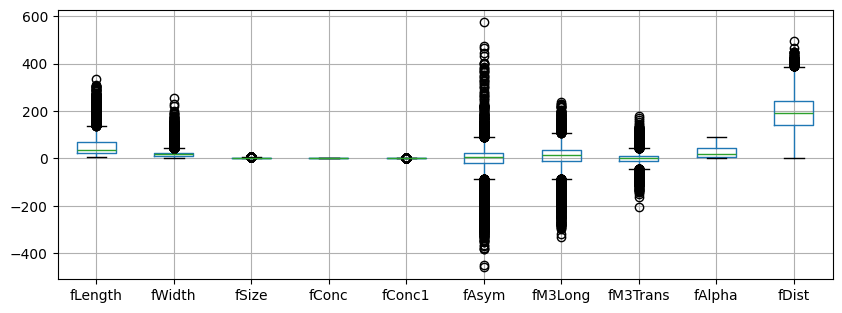

In [33]:
fig = plt.figure(figsize=(10, 3.5))
df.boxplot()
plt.show()

Атрибутите како fAsym, fM3Long, fDist, fLength, fM3Trans, и fWidth имаат доста нетипични вредности (outliers), за разлика од fSize, fConc, и fConc1. Карактеристиката fDist има најголема варијанса, т.е распространетост на податоците, што може да се увиди од ширината на box-от.

##### Хистограм на распределбата на вредонстите на атрибутите

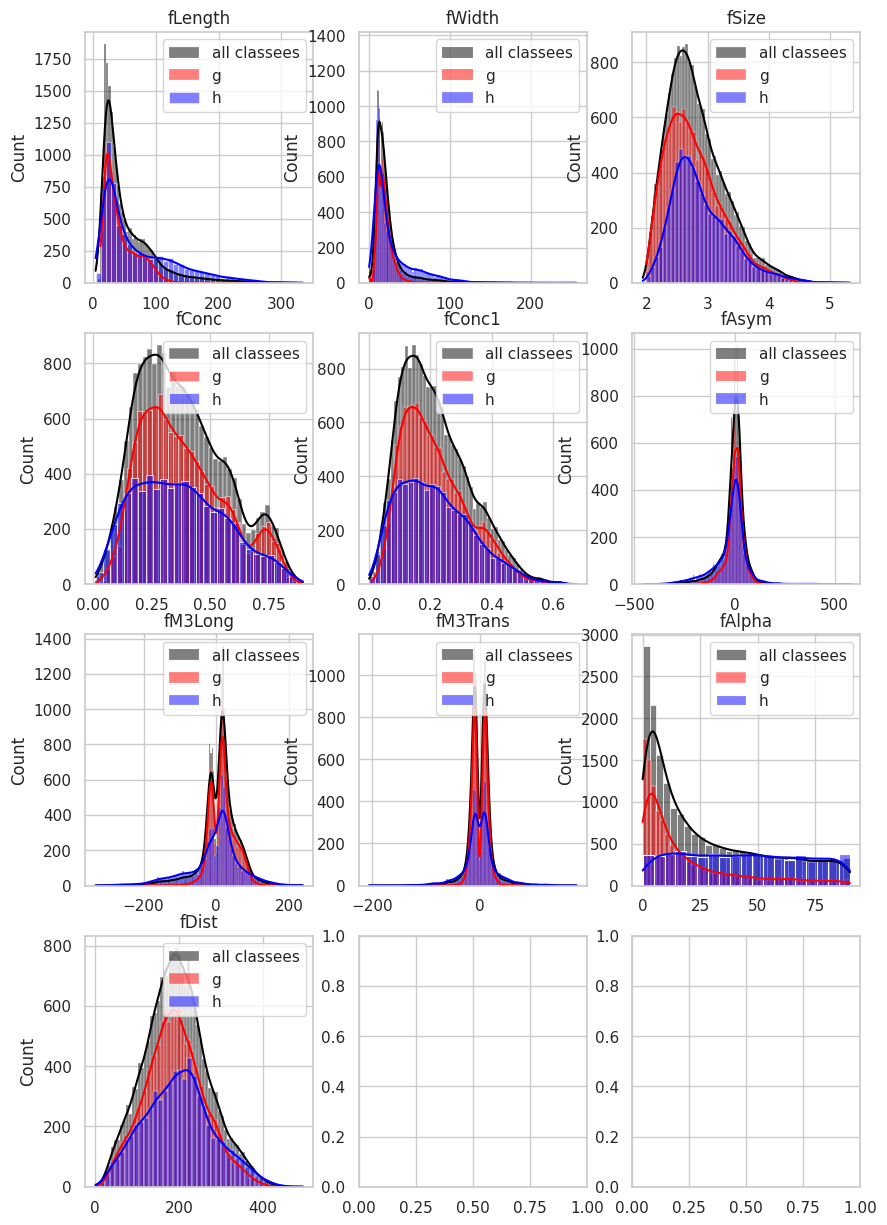

In [86]:
colors = ['red','blue']
fig = plt.figure(figsize=(10, 15))
fig.subplots(nrows=4, ncols=3)

X = df.drop(columns=['class']).values
y_numeric = df['class'].map({'g': 0, 'h': 1}).values

for feature in range(number_of_features): # се прикажува посебен график за секој атрибут
    ax = plt.subplot(4,3, feature+1)
    plt.title(feature_names[feature])
    sns.histplot(X[:,feature],color='black',label='all classees',kde=True,stat="count") # се прикажува хистограм на вредностите на соодветниот атрибут без разлика во која класа припаѓаат
    for Class in range(number_of_classes): # се прикажува хистограм на вредностите на соодветниот атрибут за секоја класа посебно
        sns.histplot(X[y_numeric == Class,feature], color=colors[Class], label=class_names[Class],kde=True,stat="count") # Со X[y==c,i] се зема атрибутот i од примероците кои припаѓаат во класа c
    plt.legend()
plt.show()

Овие дијаграми даваат слика на небалансирано податочно множество, имено од претходните метрики увидовме дека класата 'g' има двојно повеќе примероци отколку класата 'h', што би ја објаснила ова небалансираност, т.е класата 'h' на кај сите атрибути има помала дистрибуција од 'g'. Исто така со присуството на outliers, влијае врз дистрибуциите од некои од атрибутите (fAsym, fM3Long, fDist и fLength) каде може да се забележи издолжени опашки во хистограмите.

##### Дијаграми на растурање

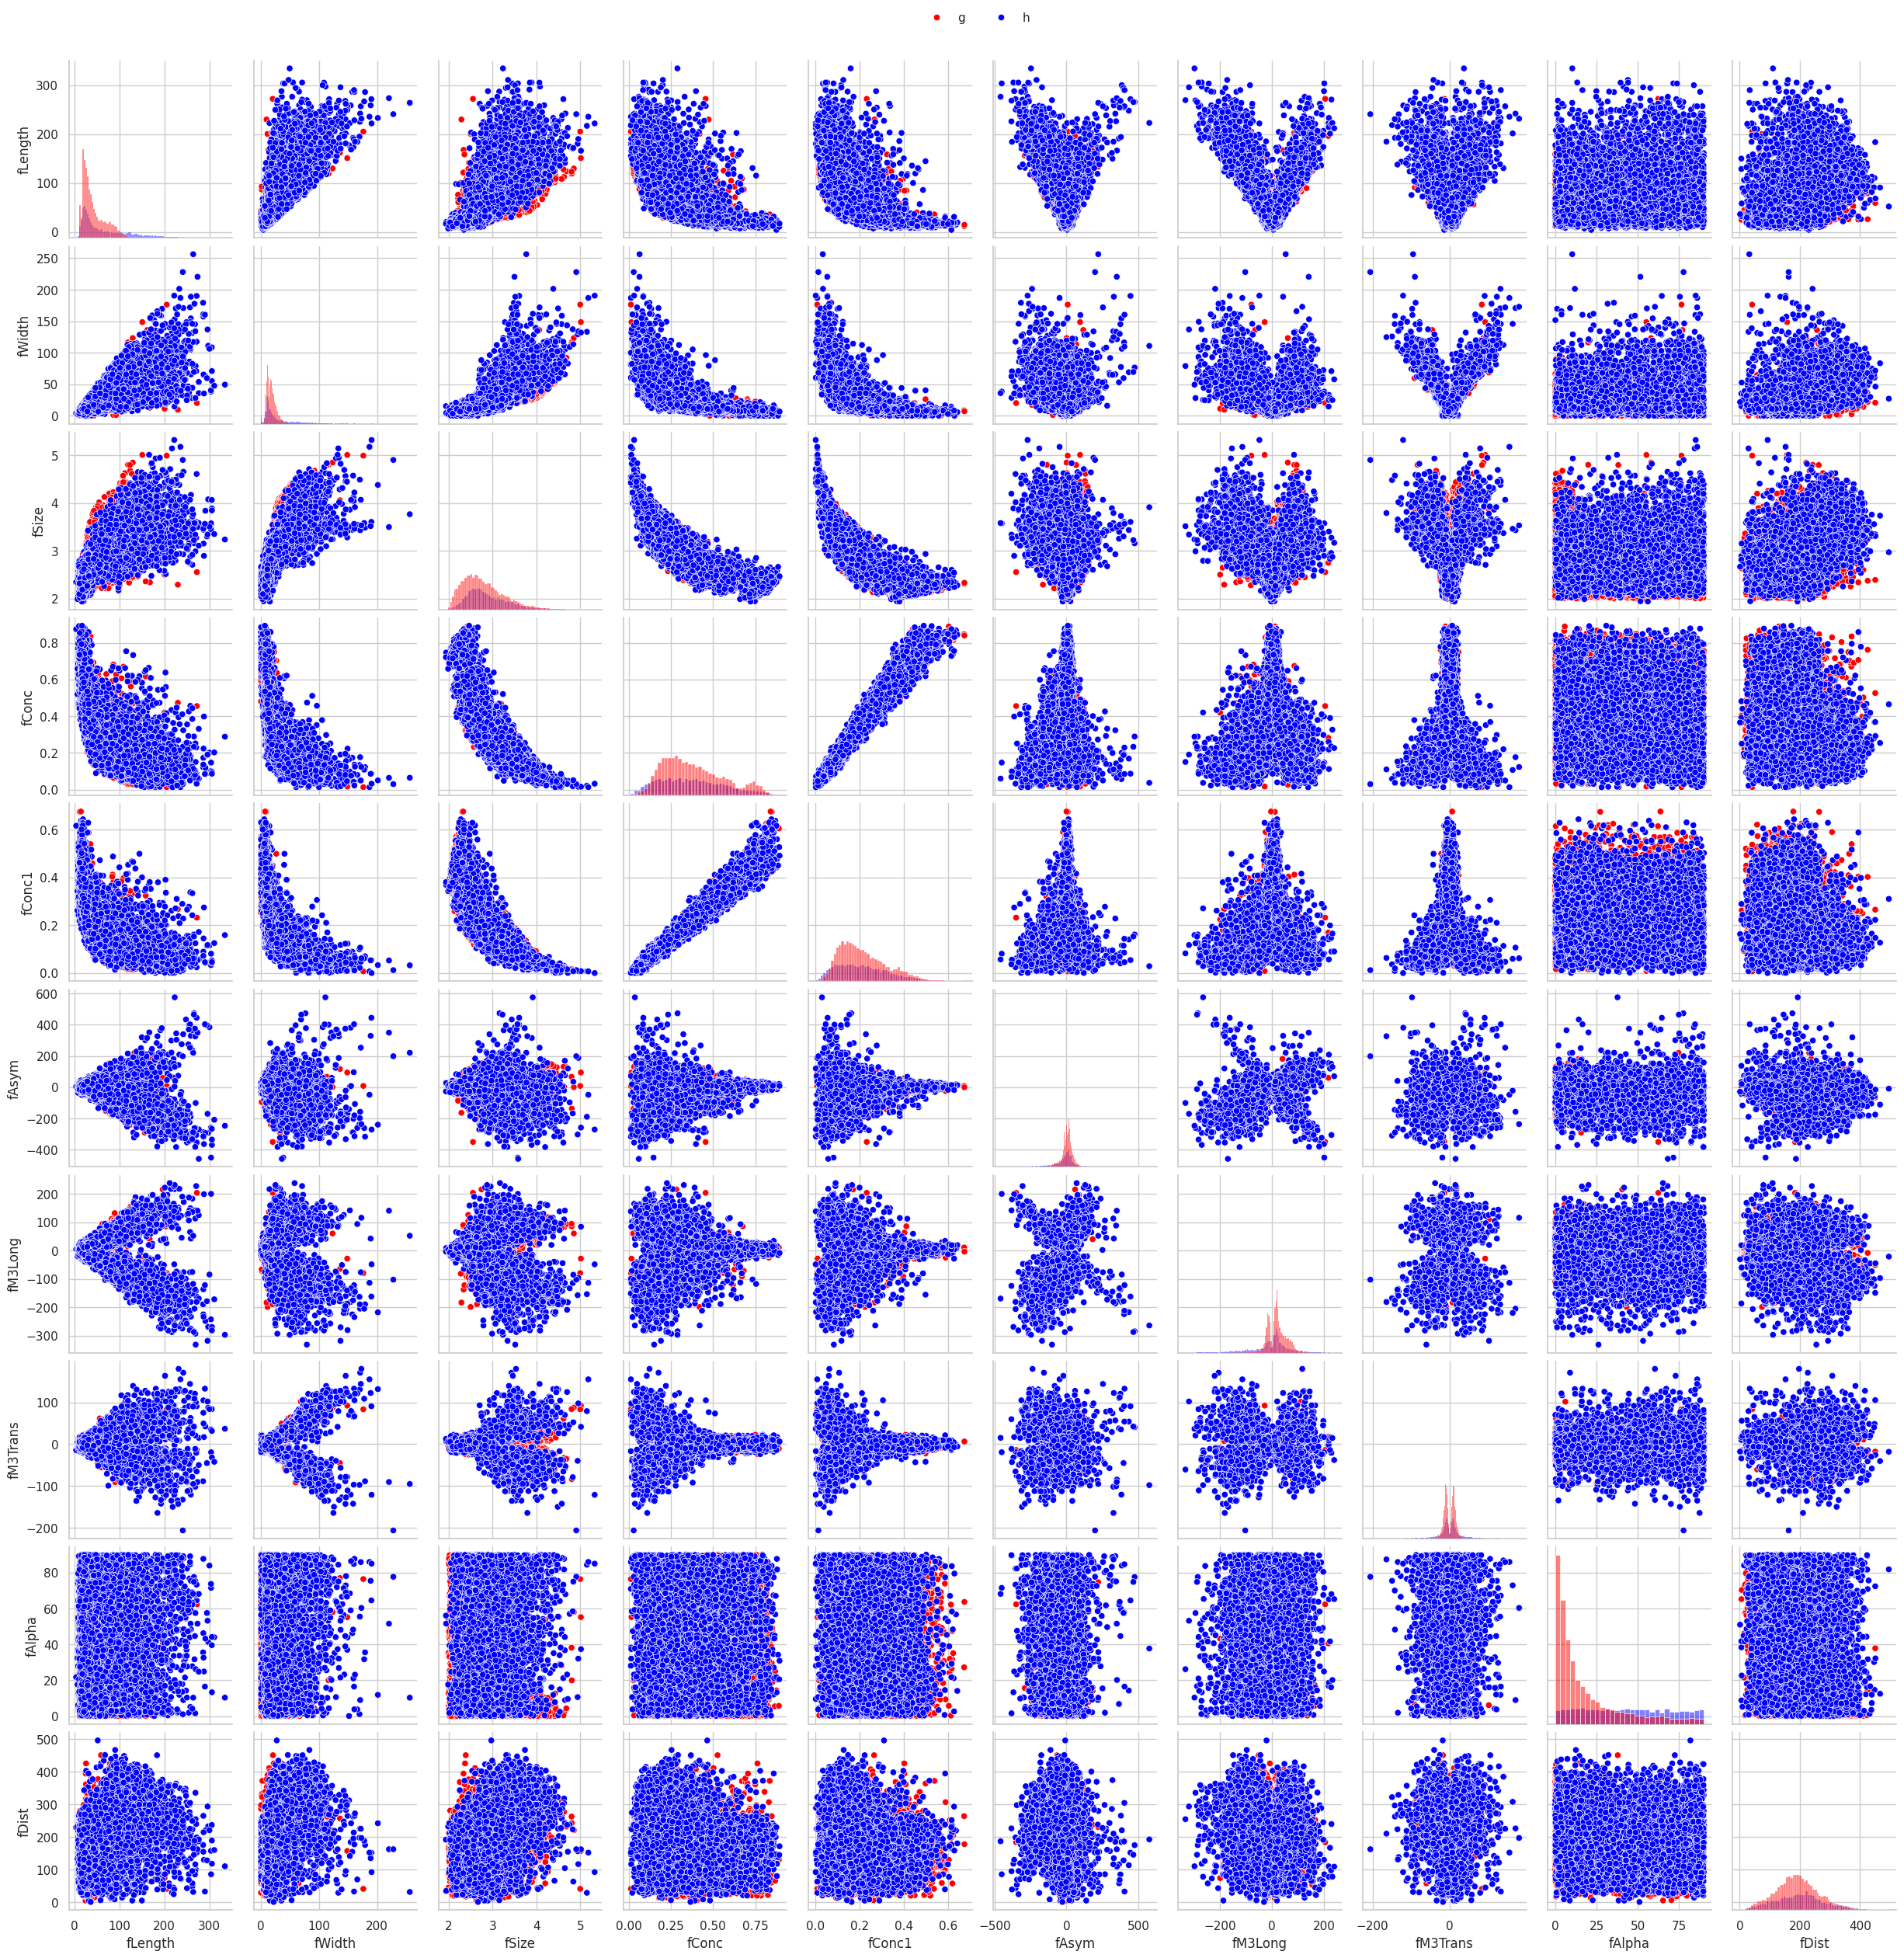

In [89]:
g=sns.pairplot(df, hue="class", diag_kind="hist",palette=colors);
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=3, title=None);
for t, l in zip(g._legend.texts, class_names):
    t.set_text(l)

##### Kernel Density Estimation (KDE) - естимираните густини на распределба на вредностите на променливите

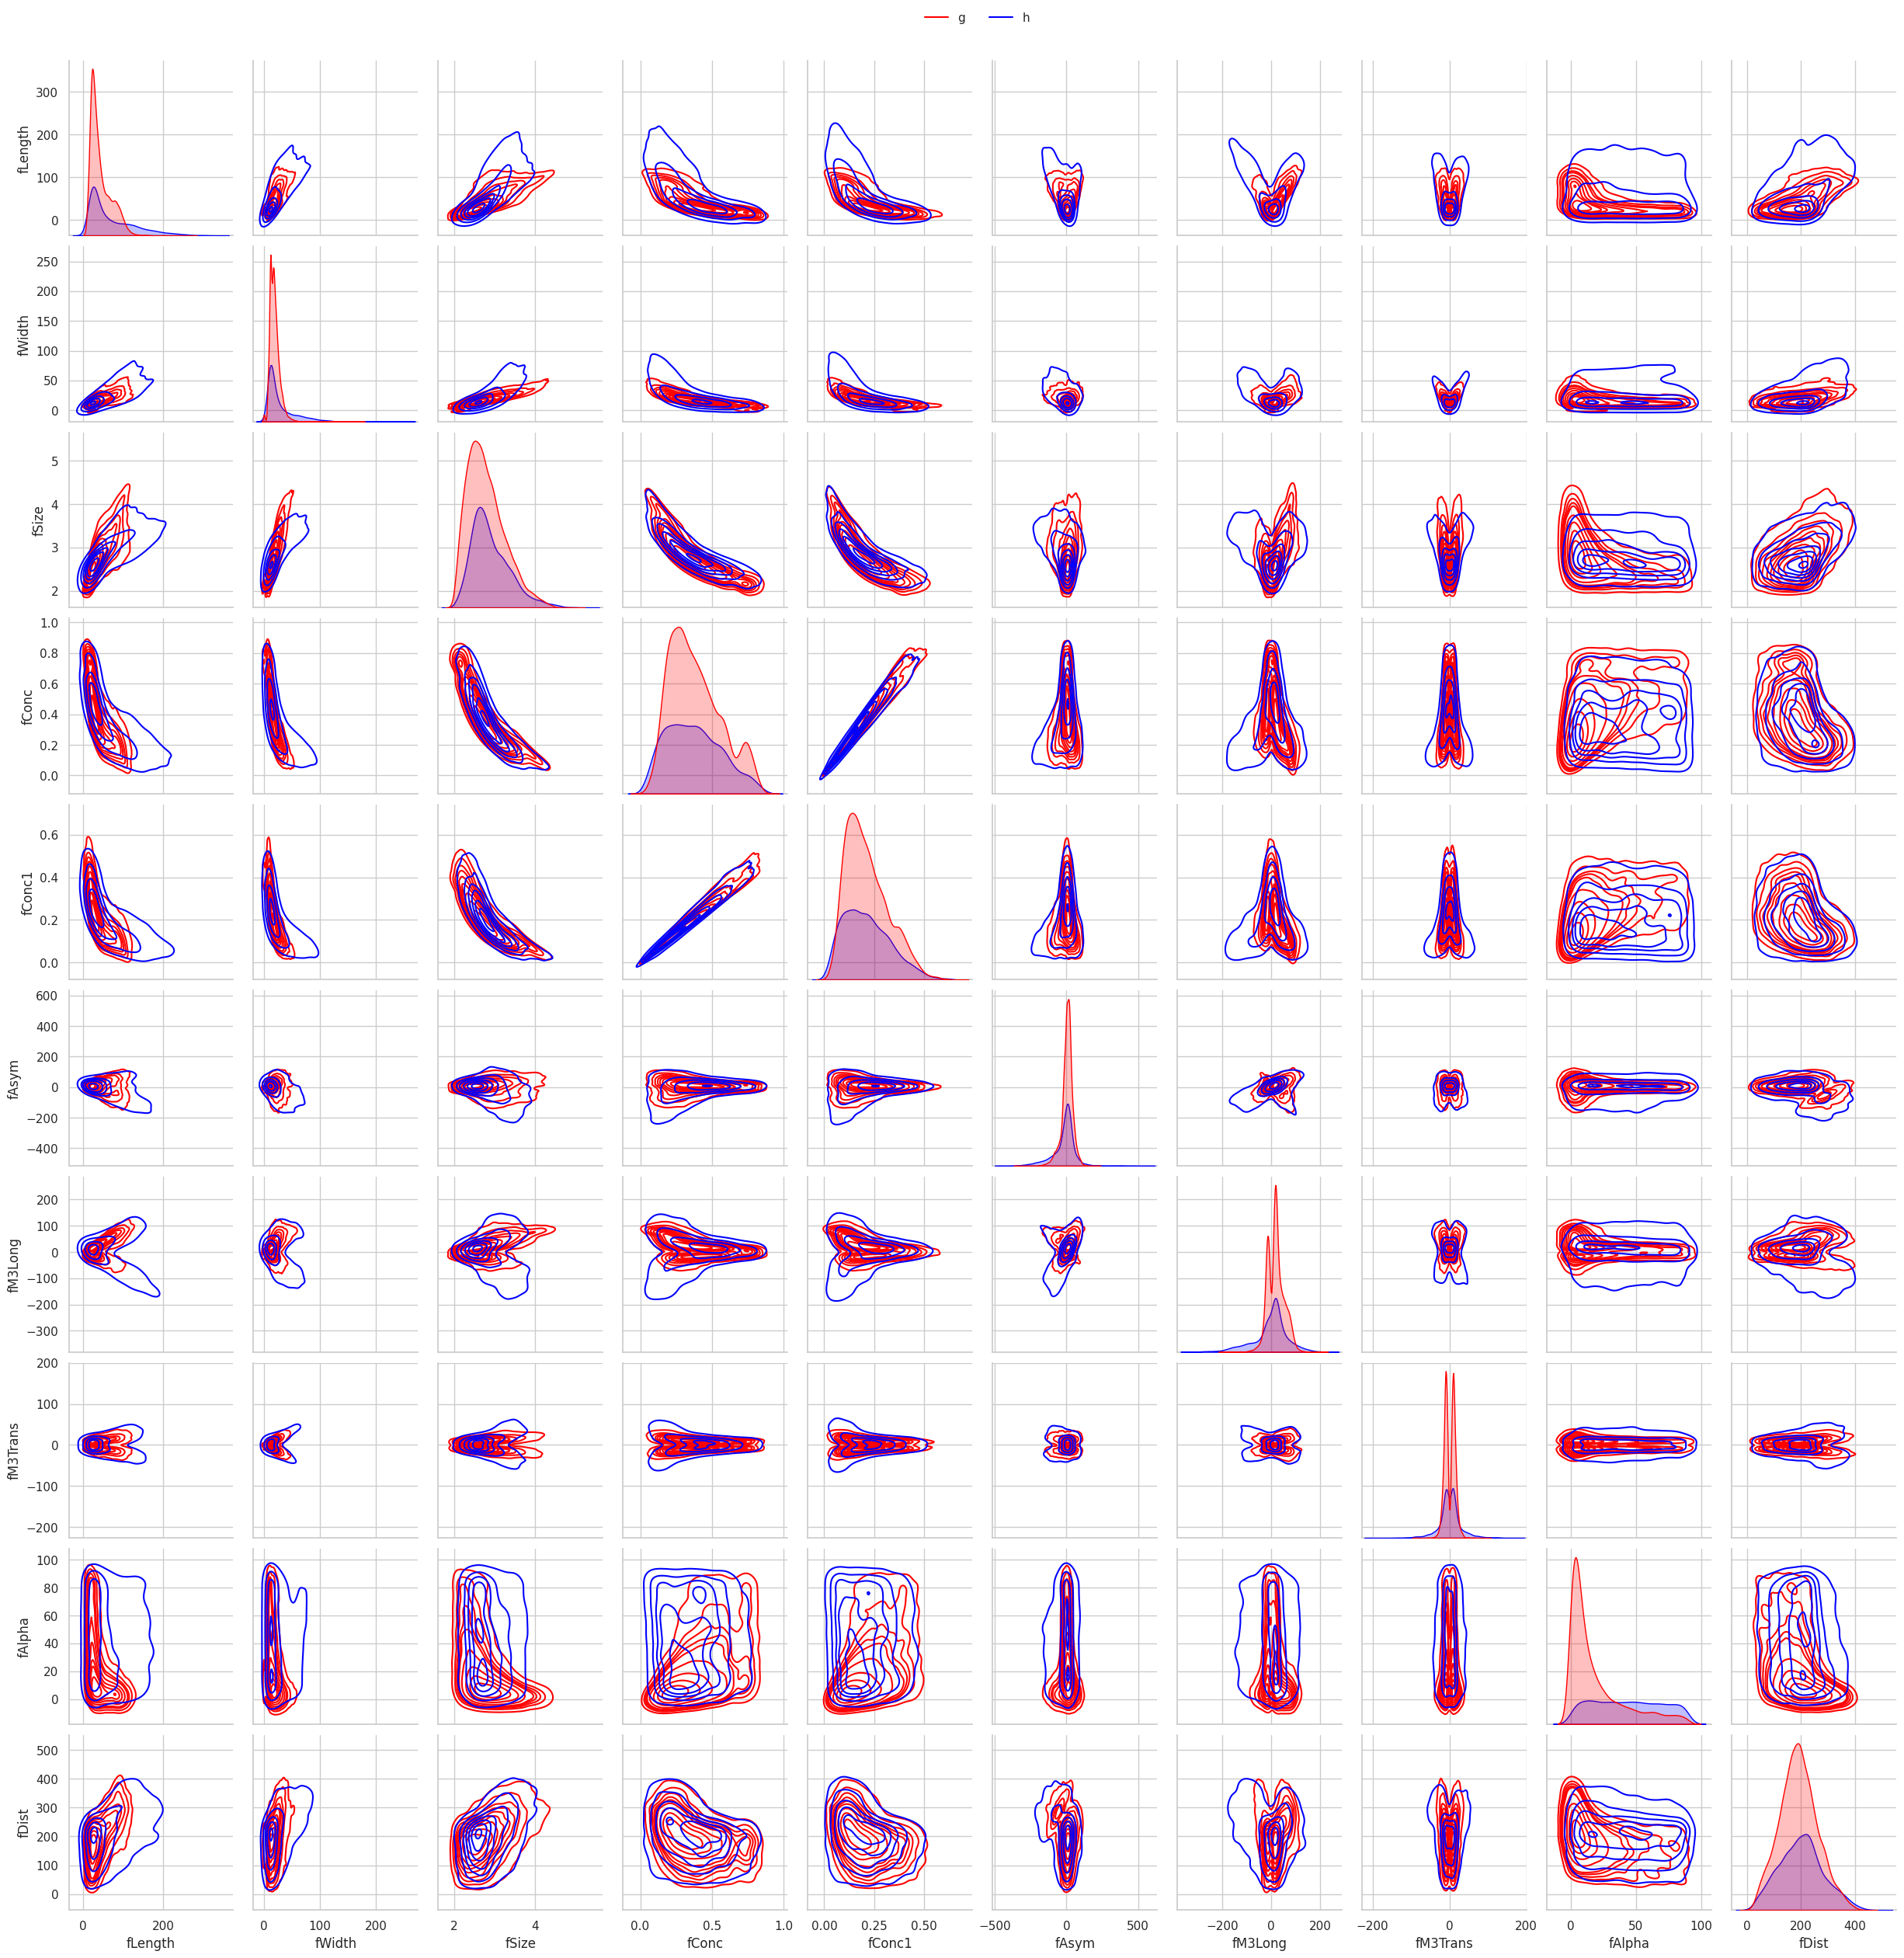

In [90]:
g=sns.pairplot(df, hue="class",kind="kde",palette=colors);
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=3, title=None);
for t, l in zip(g._legend.texts, class_names):
    t.set_text(l)

### Класификација

##### Поделба на податочно множество

In [126]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])  # 'g' -> 0, 'h' -> 1

# features X and class targets (y)
X = df.drop(columns=['class']).values
y = df['class'].values

# trainand test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracy_scores_measure = {}

##### Класификација со квадратна дискриминативна анализа


In [127]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

print("Приорните веројатности на класите се",QDA.priors_)
y_pred = QDA.predict(X_test)
QDA_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со методот QDA е ", round(QDA_accuracy, 3))
accuracy_scores_measure['QDA'] = QDA_accuracy

Приорните веројатности на класите се [0.64879075 0.35120925]
Точноста на класификацијата со методот QDA е  0.789


##### Класификација со линеарна дискриминативна анализа

In [128]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
LDA_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со методот LDA е", round(LDA_accuracy, 3))
accuracy_scores_measure['LDA'] = LDA_accuracy

Точноста на класификацијата со методот LDA е 0.788


##### Класификација со Наивен Баесов класификатор

In [129]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB_accuracy = accuracy_score(y_test, y_pred)

print("Точноста на класификацијата со Гаусовиот наивен Баесов класификатор е", round(GNB_accuracy, 3))
accuracy_scores_measure['GNB'] = GNB_accuracy

Точноста на класификацијата со Гаусовиот наивен Баесов класификатор е 0.727


##### Споредба на различните модели за класификација

<ipython-input-130-241227b08ed1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="viridis")


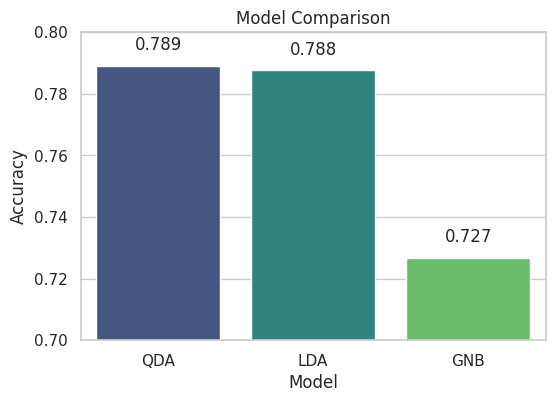

In [130]:
models = list(accuracy_scores_measure.keys())
accuracy = list(accuracy_scores_measure.values())

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracy, palette="viridis")

plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Model Comparison")
plt.ylim(0.7, 0.8)

for i, v in enumerate(accuracy):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontsize=12)

plt.show()

##### Заклучок

Причината зошто Наивниот баесов класификатор има помала точност (accuracy) од QDA и LDA моделите може да се должи на претпоставките кои овие модели ги прават врз податочното множество. Имено, Наивниот Баесов класификатор работи под претпоставка дека карактеристиките се независни една од друга. Но, од корелациската матрица, гледаме дека некои карактеристики (на пример, fConc и fConc1) имаат висока корелација (~0.98). Ова значи дека Наивниот Баес може да ги третира како независни, што води до неточни пресметки на веројатностите и намалена точност. LDA и QDA претпоставуваат дека податоците се Гаусово распределени и дозволуваат одредено ниво на корелација помеѓу карактеристиките. LDA користи линеарни граници за класификација, додека QDA дозволува нелинеарни граници, што може да биде корисно доколку границите помеѓу класите не се линеарни.